In [1]:
import numpy as np
from thermoengine import model
import matplotlib.pyplot as plt

In [2]:
modelDB = model.Database()

In [3]:
Qz = modelDB.get_phase('Qz')
Fa = modelDB.get_phase('Fa')
Mag = modelDB.get_phase('Mag')
Hem = modelDB.get_phase('Hem')
Wu = modelDB.get_phase('Hem')
O2 = modelDB.get_phase('O2')
# modelDB.phase_info.loc[modelDB.phase_info['phase_name']=='Magnetite']

In [4]:
(modelDB.phase_info['phase_name'] == 'Wustite').sum()

0

In [5]:
T = 1350+273
P = 1

T0 = 273.15
P0 = 1

dmu_Qz = Qz.chem_potential(T, P) - Qz.chem_potential(T0, P0)
dmu_Mag = Mag.chem_potential(T, P) - Mag.chem_potential(T0, P0)
dmu_Fa = Fa.chem_potential(T, P) - Fa.chem_potential(T0, P0)
dmu_O2 = O2.chem_potential(T, P) - O2.chem_potential(T0, P0)


dlogfO2 = 1/(2.303*8.314*T)*(2*dmu_Mag + 3*dmu_Qz - 3*dmu_Fa - dmu_O2)
print(dlogfO2)
print(dmu_O2/(2.303*8.314*T))

0.7441734185752077
-2.991135492073661


In [6]:
np.log10(10)/np.log10(np.exp(1
                            ))

2.302585092994046

In [7]:
print(O2.param_names)
print(O2.get_param_values())
O2.param_props

['delta H', 'S', 'Cp k0', 'Cp k1', 'Cp k2', 'Cp k3', 'Cp l1', 'Cp l2', 'Cp Tt', 'Cp Ht', 'V', 'EOS v1', 'EOS v2', 'EOS v3', 'EOS v4']
[]


OrderedDict([('supports_calib', 1),
             ('param_num', 15),
             ('param_names',
              ['delta H',
               'S',
               'Cp k0',
               'Cp k1',
               'Cp k2',
               'Cp k3',
               'Cp l1',
               'Cp l2',
               'Cp Tt',
               'Cp Ht',
               'V',
               'EOS v1',
               'EOS v2',
               'EOS v3',
               'EOS v4']),
             ('param_units',
              array(['joules', 'joules/K', 'joules/K', 'joules/K', 'joules/K',
                     'joules/K', 'joules/K', 'joules/K', 'K', 'joules', 'joules/bar',
                     'bar^-1', 'bar^-2', 'K^-1', 'K^-2'], dtype='<U10')),
             ('param0',
              array([2.050330e+02, 0.000000e+00, 2.310248e+01, 8.048880e+02,
                     1.762835e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
                     0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
                    

In [8]:
T_ref = 600+273
P_ref=1
mu_Qz = Qz.chem_potential(T_ref, P_ref)
mu_Mag = Mag.chem_potential(T_ref, P_ref)
mu_Fa = Fa.chem_potential(T_ref, P_ref)
mu_O2 = O2.chem_potential(T_ref, P_ref)

logfO2_ref = -20
dGr = 2*mu_Mag + 3*mu_Qz - 3*mu_Fa - mu_O2
dGr0 = dGr - (2.303*8.314*T_ref)*logfO2_ref 

logfO2 = 1/(2.303*8.314*T_ref)*(dGr - dGr0)
logfO2 = 1/(2.303*8.314*T_ref)*dGr + 10
logfO2

-20.009068237074377

In [9]:
def muO2(T, P):
    Tref = 298.15
    Cp_k0 = 23.10248
    Cp_k1 = 804.8876
    Cp_k2 = 1762835.0
    Cp_k3 = 0.0
    Cp_l1 = 18172.91960
    Cp_Tt = 0.002676
    Hs = (23.10248*(T-Tref) + 2.0*804.8876*(np.sqrt(T)-np.sqrt(Tref)) - 1762835.0*(1.0/T-1.0/Tref)
          - 18172.91960*np.log(T/Tref) + 0.5*0.002676*(T*T-Tref*Tref))
    Ss = (205.15 + 23.10248*np.log(T/Tref)  - 2.0*804.8876*(1.0/np.sqrt(T)-1.0/np.sqrt(Tref)) 
          - 0.5*1762835.0*(1.0/(T*T)-1.0/(Tref*Tref)) + 18172.91960*(1.0/T-1.0/Tref) + 0.002676*(T-Tref))
    mu_O2 = Hs - T*Ss
    return mu_O2

def QFM_buffer(T, P, fO2_offset=0):
    mu_Qz = Qz.chem_potential(T, P)
    mu_Mag = Mag.chem_potential(T, P)
    mu_Fa = Fa.chem_potential(T, P)
    # mu_O2 = O2.chem_potential(T, P)
    mu_O2 = muO2(T, P)

    dGr = 2*mu_Mag + 3*mu_Qz - 3*mu_Fa - mu_O2

    # logfO2 = 1/(2.303*8.314*T)*(dGr - dGr0)
    logfO2 = 1/(2.303*8.314*T)*dGr + fO2_offset
    return logfO2

In [10]:
def MH_buffer(T, P, fO2_offset=0):
    mu_Mag = Mag.chem_potential(T, P)
    mu_Hem = Hem.chem_potential(T, P)
    # mu_O2 = O2.chem_potential(T, P)
    # mu_O2 = O2.chem_potential(T, P)
    mu_O2 = muO2(T, P)

    dGr = 6*mu_Hem - 4*mu_Mag - mu_O2

    # logfO2 = 1/(2.303*8.314*T)*(dGr - dGr0)
    logfO2 = 1/(2.303*8.314*T)*dGr + fO2_offset
    return logfO2

In [11]:
MH_buffer(600+273, 1)

-14.744719020195994

In [12]:
modelDB.phase_info

abbrev      phase_name        formula phase_type endmember_num
0      Bt         Biotite                  solution             2
1     Cam  Clinoamphibole                  solution             3
2     Cpx   Clinopyroxene                  solution             7
3     Fsp        Feldspar                  solution             3
4     Grt          Garnet                  solution             3
..    ...             ...            ...        ...           ...
87    cZo    Clinozoisite  Ca2Al3Si3O13H       pure             1
88     O2      Oxygen_Gas             O2       pure             1
89     S2      Sulfur_Gas             S2       pure             1
90     H2    Hydrogen_Gas             H2       pure             1
91    H2O           Water            H2O       pure             1

[92 rows x 5 columns]

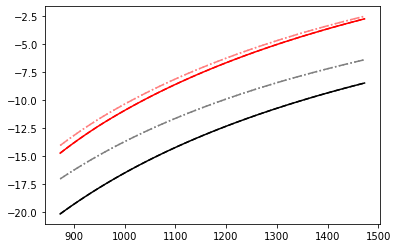

In [30]:
T = np.linspace(600, 1200) +273
P = 1
plt.figure()
plt.plot(T, QFM_buffer(T, P), 'k-', T, modelDB.redox_buffer(T, P, buffer='QFM'), 'k--')
plt.plot(T, MH_buffer(T, P), 'r-', T, modelDB.redox_buffer(T, P, buffer='MH'), 'r--')

P = 3e4
plt.plot(T, QFM_buffer(T, P), 'k-.', T, modelDB.redox_buffer(T, P, buffer='QFM'), 'k:', 
         color=[.5,.5,.5])
plt.plot(T, MH_buffer(T, P), 'r-.', T, modelDB.redox_buffer(T, P, buffer='MH'), 'r:',
        color=[1,.5,.5])

In [14]:
logfO2_ref = -20
# logfO2_ref*(2.303*8.314*Tref)(2*mu_Mag + 3*mu_Qz - 3*mu_Fa - mu_O2)

In [15]:
modelDB.phase_info

abbrev      phase_name        formula phase_type endmember_num
0      Bt         Biotite                  solution             2
1     Cam  Clinoamphibole                  solution             3
2     Cpx   Clinopyroxene                  solution             7
3     Fsp        Feldspar                  solution             3
4     Grt          Garnet                  solution             3
..    ...             ...            ...        ...           ...
87    cZo    Clinozoisite  Ca2Al3Si3O13H       pure             1
88     O2      Oxygen_Gas             O2       pure             1
89     S2      Sulfur_Gas             S2       pure             1
90     H2    Hydrogen_Gas             H2       pure             1
91    H2O           Water            H2O       pure             1

[92 rows x 5 columns]

In [16]:

affinity = 2*mu_Mag+3*mu_Qz-3*mu_Fa
dlogfO2 = affinity/(2.303*8.314*T)
dlogfO2

mu0_Qz = Qz.chem_potential(T0, P0)
mu0_Mag = Mag.chem_potential(T0, P0)
mu0_Fa = Fa.chem_potential(T0, P0)
affinity0 = 2*mu0_Mag+3*mu0_Qz-3*mu0_Fa

dlogfO2 = (affinity-affinity0)/(2.303*8.314*T)
print(dlogfO2)

[-0.28409584 -0.28016617 -0.27634372 -0.27262418 -0.26900343 -0.2654776
 -0.26204299 -0.25869613 -0.25543367 -0.25225248 -0.24914956 -0.24612204
 -0.24316722 -0.2402825  -0.23746542 -0.23471364 -0.23202489 -0.22939706
 -0.22682808 -0.224316   -0.22185895 -0.21945515 -0.21710288 -0.2148005
 -0.21254644 -0.2103392  -0.20817733 -0.20605945 -0.20398422 -0.20195038
 -0.19995669 -0.19800199 -0.19608513 -0.19420503 -0.19236064 -0.19055095
 -0.188775   -0.18703184 -0.18532058 -0.18364036 -0.18199032 -0.18036968
 -0.17877764 -0.17721347 -0.17567642 -0.17416581 -0.17268096 -0.17122121
 -0.16978594 -0.16837452]


In [17]:
Tref = 1350+273
Pref = 1

T0 = 273.15
P0 = 1.013

# T0 = 1000+273
# P0 = 1

dmu_Mag = Mag.chem_potential(Tref, Pref) - Mag.chem_potential(T0, P0)
dmu_Qz = Qz.chem_potential(Tref, Pref) - Qz.chem_potential(T0, P0)
dmu_Fa = Fa.chem_potential(Tref, Pref) - Fa.chem_potential(T0, P0)

dGr0 = (modelDB.redox_buffer(Tref, Pref, buffer='QFM', ignore_lims=True)
        -modelDB.redox_buffer(T0, P0, buffer='QFM', ignore_lims=True))
dlogfO2 = 1/(2.303*8.314*Tref)*(2*dmu_Mag + 3*dmu_Qz - 3*dmu_Fa - dGr0)
dlogfO2

-2.2496130056474795

In [18]:
T = 1050+273
P = 1

dmu_Mag = Mag.chem_potential(T, P) - Mag.chem_potential(Tref, Pref)
dmu_Qz = Qz.chem_potential(T, P) - Qz.chem_potential(Tref, Pref)
dmu_Fa = Fa.chem_potential(T, P) - Fa.chem_potential(Tref, Pref)

dlogfO2 = 1/(2.303*8.314*T)*(2*dmu_Mag + 3*dmu_Qz - 3*dmu_Fa - dGr0)
dlogfO2

1.1043480273346726

In [19]:
(+modelDB.redox_buffer(T, P, buffer='QFM', ignore_lims=True)
 -modelDB.redox_buffer(Tref, Pref, buffer='QFM', ignore_lims=True))

-3.5034798798966706

In [20]:
modelDB.redox_buffer(T0+1000, P0, buffer='QFM', ignore_lims=True)

-11.140284664637099

In [21]:
Fa.formula

'Fe2SiO4'

In [22]:
modelDB.redox_buffer(T0+1000, P0, buffer='QFM', ignore_lims=True)

-11.140284664637099